In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.readf = pd.read_csv('Churn_Modelling.csv')  #считать исходную таблицу
df

In [ ]:
bank = df[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','convert']]  #создать таблицу с банковскими даннымиd_csv('Churn_Modelling.csv')  #считать исходную таблицу
bank
df.sample(n=10)

In [ ]:
df = pd.read_csv('bank_10.csv', sep=';')
df.sample(n=10)

Стандартный синтаксис создания графика

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

### Виды графиков

#### Линейный график

In [ ]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

##### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

#### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

### Гистограмма
Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

#### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

#### Диаграмма рассеяния

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

##### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

#### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

#### Столбчатые диаграммы

In [ ]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

#### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30)

##### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30)

#### Многорядовые столбчатые диаграммы

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

In [ ]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

#### Сложенная столбчатая диаграмма

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

#### Ящики с усами

In [ ]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1])

In [ ]:
sns.histplot(x=data1)

#### Matplotlib

In [ ]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

##### Seaborn

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no'])

#### Круговая диаграмма

In [ ]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

##### Matplotlib

In [ ]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

### Визуальный анализ данных
#### Описание датасета

##### Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

- longitude - долгота
- latitude - широта
- housing_median_age - средний возраст дома
- total_rooms - общее количество комнат
- total_bedrooms - общее количество спален
- population - количество проживающих
- households - домохозяйства
- ocean_proximity - близость океана
- median_income - средний доход
- median_house_value - средняя стоимость дома

In [ ]:
df = pd.read_csv('',encoding='latin1')
df.head()

#### Распределение вещественных признаков

In [ ]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [ ]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False)

#### Поиск выбросов с помощью box plot

##### Как строится box plot

#### Подробное объяснение

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"
#### Как строятся "усы" - вариантов масса

- среднее +/- 3 сигма (стандартное отклонение)
- min / max
- median +/- 1.5*(q75 - q25),

##### *Интерквартильный размах = q75 - q25

In [ ]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

#### Анализ категориальных признаков

In [ ]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [ ]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

#### Анализ взаимных распределений

In [ ]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg')

In [ ]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde')

In [ ]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg')

#### Видно два города, имеет смысл посмотреть на зависимость по отдельности

In [ ]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg')

In [ ]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg')

#### longitude

In [ ]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg')

In [ ]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg')

#### Категориальные / бинарные признаки
#### box plot

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

### Как строится box plot

#### Подробное объяснение

-box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"
#### Как строятся "усы" - вариантов масса

- среднее +/- 3 сигма (стандартное отклонение)
- min / max
- median +/- 1.5*(q75 - q25),

#### *Интерквартильный размах = q75 - q25

#### Матрица корреляций
- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только линейной связи

In [ ]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg')

In [ ]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg')

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Гео данные

In [ ]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

In [ ]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

#### Folium

In [ ]:
# !pip install folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

### Kepler**

In [ ]:
# !conda install -c conda-forge keplergl

In [ ]:
# !pip install keplergl==0.1.1

In [ ]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

- User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
- Map saved to ./california.html!

#### Summary
1. Матрица корреляции
2. Знакомство с признаками
- Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
- sns.violinplot - Узнать распределение признака
- Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
- Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
- sns.jointplot - Взаимное изменение признаков
- plt.pie - Изобразить долю объектов от всего кол-ва
3. Поиск выбросов
- sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
- sns.boxplot - Всё, что выходит за пределы усов - выбросы
#### Seaborn - https://seaborn.pydata.org/examples/index.html
#### Matplotlib - https://matplotlib.org/3.1.0/gallery/index.html

### Seminar

In [5]:
df = pd.read_csv('./laptops_10.csv',encoding='latin1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


1.1 Изучите количество памяти с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


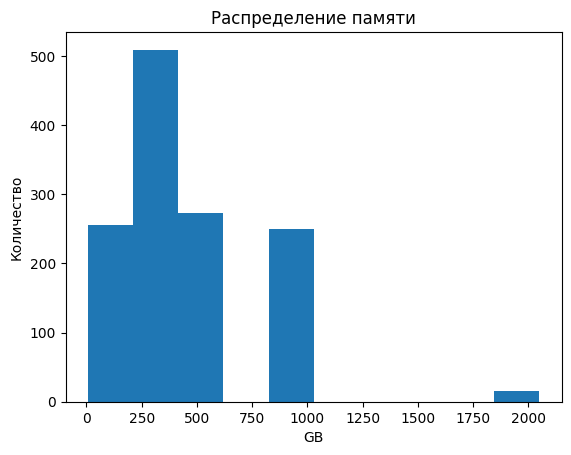

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');


1.2 Изучите стоимость ноутбуков с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


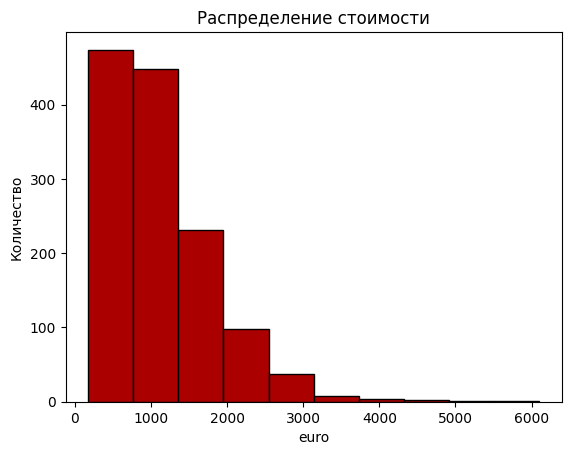

In [7]:
plt.hist(df['Price_euros'], edgecolor='black', color='#AA0000')
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('Количество');


1.3 Изучите вес ноутбуков с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


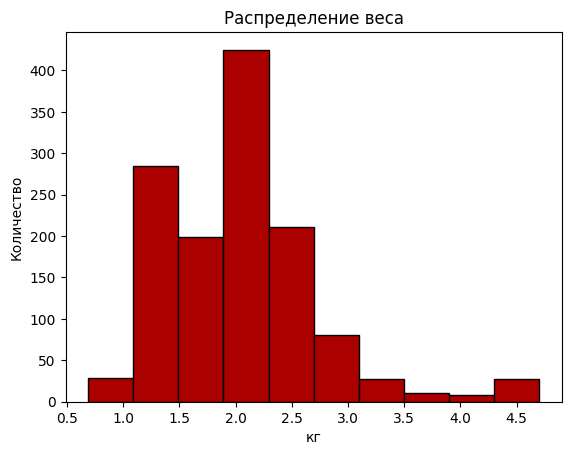

In [8]:
plt.hist(df['Weight'], edgecolor='black', color='#AA0000')
plt.title('Распределение веса')
plt.xlabel('кг')
plt.ylabel('Количество');


2.1 Изучите распределение типов носителя
Постройте график
Сделайте выводы


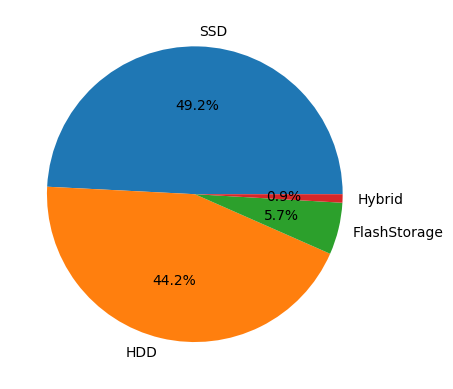

In [9]:
x = df['Memory_Type'].value_counts()
x
name = x.index
values = x.values
plt.pie(values, labels=name, autopct='%.1f%%');


2.2 Изучите распределение компаний производителей
Постройте график
Сделайте выводы


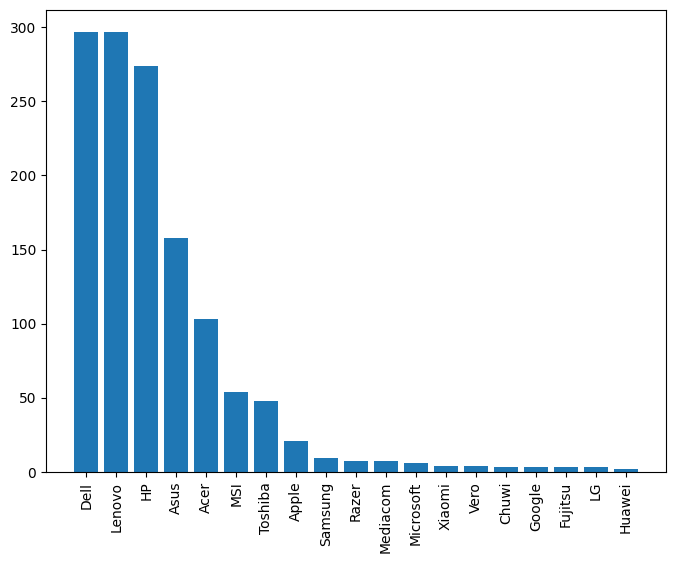

In [10]:
x = df['Company'].value_counts()
x
name = x.index
values = x.values
plt.figure(figsize=(8, 6))
plt.bar(name, values)
plt.xticks(rotation=90);


2.3 Изучите распределение операционной системы
Постройте график
Сделайте выводы


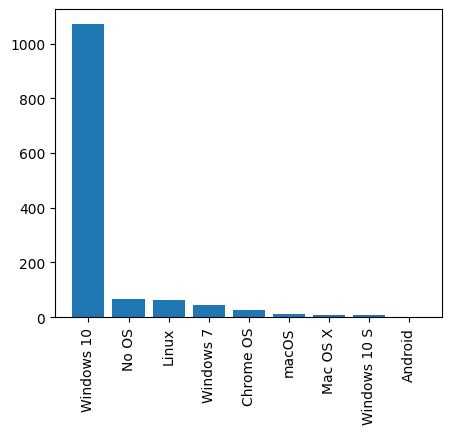

In [11]:
x = df['OpSys'].value_counts()
x
name = x.index
values = x.values
plt.figure(figsize=(5, 4))
plt.bar(name, values)
plt.xticks(rotation=90);


2.4 Изучите распределение компаний производителей CPU
Постройте график
Сделайте выводы


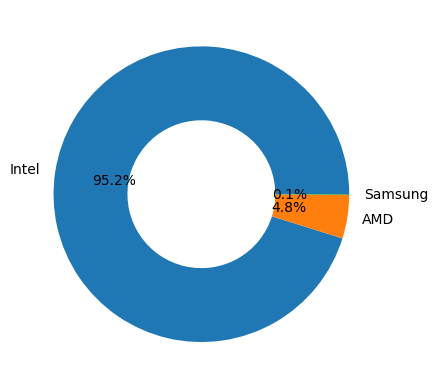

In [12]:
x = df['Cpu_Company'].value_counts()
x
name = x.index
values = x.values
fig, ax = plt.subplots()
ax.pie(values, labels=name, wedgeprops=dict(width=0.5), autopct='%.1f%%');


3.1 Постройте график в абсолютных величинах¶


In [13]:
x = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
x = x.drop(columns=['Samsung']).reset_index()
x


Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


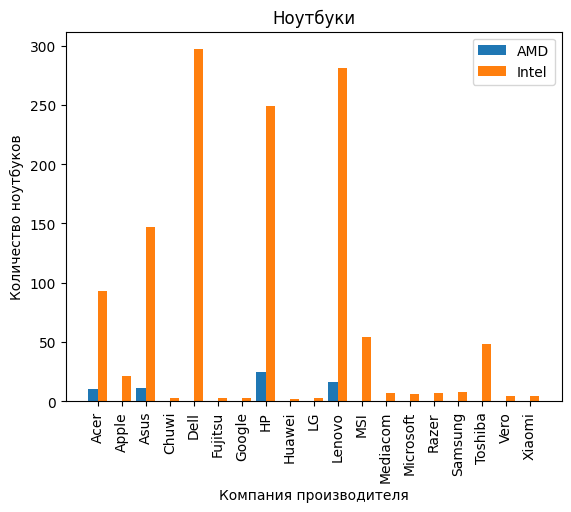

In [14]:
import numpy as np

n_ticks = np.arange(len(x['AMD']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, x['AMD'], width=w)
plt.bar(n_ticks + offset, x['Intel'], width=w)

plt.title('Ноутбуки')
plt.xlabel('Компания производителя')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, x['Company'], rotation=90);


In [15]:
x = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
x = x.drop(columns=['Samsung']).reset_index()
x


Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


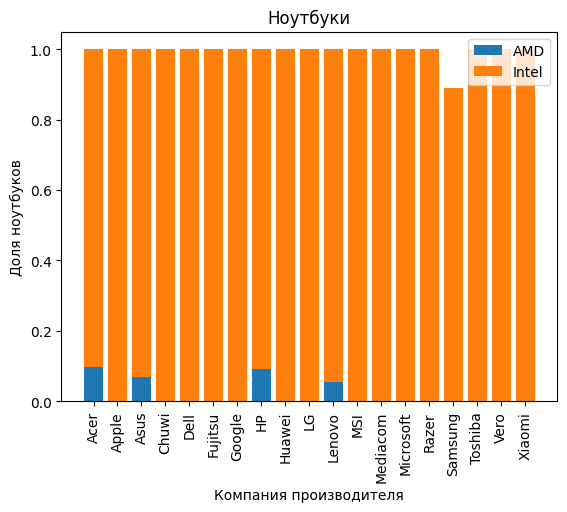

In [16]:
plt.bar(x['Company'], x['AMD'])
plt.bar(x['Company'], x['Intel'], bottom=x['AMD'])
plt.title('Ноутбуки')
plt.xlabel('Компания производителя')
plt.ylabel('Доля ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=90);


4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


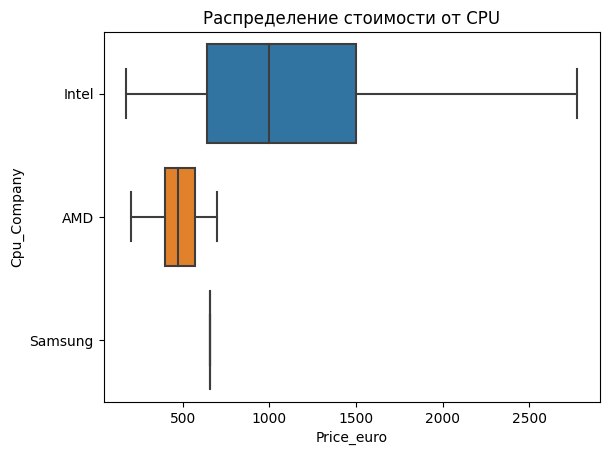

In [17]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False)

plt.xlabel('Price_euro')
plt.ylabel('Cpu_Company')
plt.title('Распределение стоимости от CPU');


In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix


In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5);


In [20]:
df = pd.read_csv('./laptop_price.csv',encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [21]:
import folium

this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(location=[point.lat, point.long], radius=2, popup=point.price).add_to(this_map)
    
df.apply(plotDot, axis=1)
this_map.fit_bounds(this_map.get_bounds())

this_map


AttributeError: 'Series' object has no attribute 'lat'